In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#model and tools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from scipy.stats import spearmanr

In [13]:
df = pd.read_csv('data/2021/TSLA.csv')
df

,date,open,high,low,close,volume,vwap,timestamp,transactions,otc
0,2020-01-02 09:30:00-05:00,28.3000,28.5000,28.2927,28.4667,5024685.0,28.3566,1577975400000,2577,NaN
1,2020-01-02 09:31:00-05:00,28.4830,28.5117,28.3567,28.4467,1815930.0,28.4462,1577975460000,1591,NaN
2,2020-01-02 09:32:00-05:00,28.4449,28.4449,28.3727,28.4150,1338435.0,28.4130,1577975520000,1212,NaN
3,2020-01-02 09:33:00-05:00,28.4102,28.5333,28.4000,28.5173,1690905.0,28.4826,1577975580000,1594,NaN
4,2020-01-02 09:34:00-05:00,28.5272,28.5333,28.3807,28.4062,1526805.0,28.4767,1577975640000,1296,NaN
...,...,...,...,...,...,...,...,...,...,...
101667,2020-12-31 15:56:00-05:00,235.0950,235.3117,235.0567,235.2296,321456.0,235.2002,1609448160000,2053,NaN
101668,2020-12-31 15:57:00-05:00,235.2317,235.4667,235.2267,235.3633,484725.0,235.3562,1609448220000,2701,NaN
101669,2020-12-31 15:58:00-05:00,235.3833,235.5000,235.2900,235.4900,505494.0,235.3498,1609448280000,2852,NaN
101670,2020-12-31 15:59:00-05:00,235.4640,235.6333,235.0000,235.0700,940443.0,235.3709,1609448340000,5234,NaN


<AxesSubplot:xlabel='timestamp'>

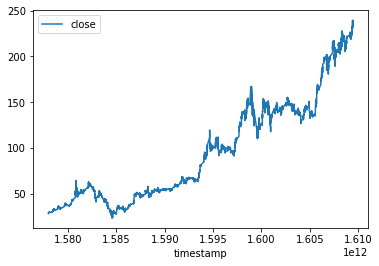

In [14]:
df.plot('timestamp', 'close')

In [15]:
df['close_log10'] = np.log10(df.close)

<AxesSubplot:xlabel='timestamp'>

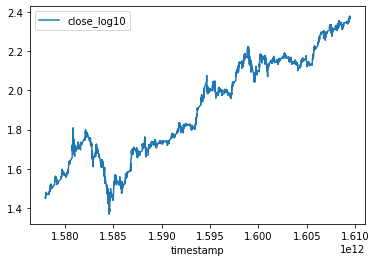

In [16]:
df.plot('timestamp', 'close_log10')

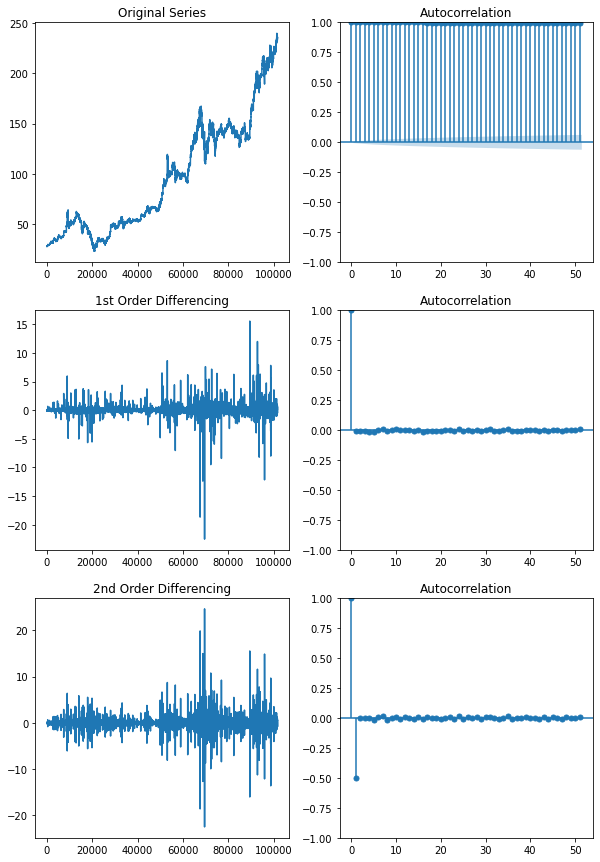

In [30]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

axes[0, 0].plot(df.close)
axes[0, 0].set_title('Original Series')
plot_acf(df.close, ax=axes[0, 1])

axes[1, 0].plot(df.close.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.close.diff().dropna(), ax=axes[1, 1])

axes[2, 0].plot(df.close.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.close.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [32]:
result = adfuller(df.close.dropna())
print('Original Series')
print('p-value: ', result[1])

result = adfuller(df.close.diff().dropna())
print('1st Order Differencing')
print('p-value: ', result[1])

result = adfuller(df.close.diff().diff().dropna())
print('2nd Order Differencing')
print('p-value: ', result[1])

Original Series
p-value:  0.9945816685448623
1st Order Differencing
p-value:  0.0
2nd Order Differencing
p-value:  0.0


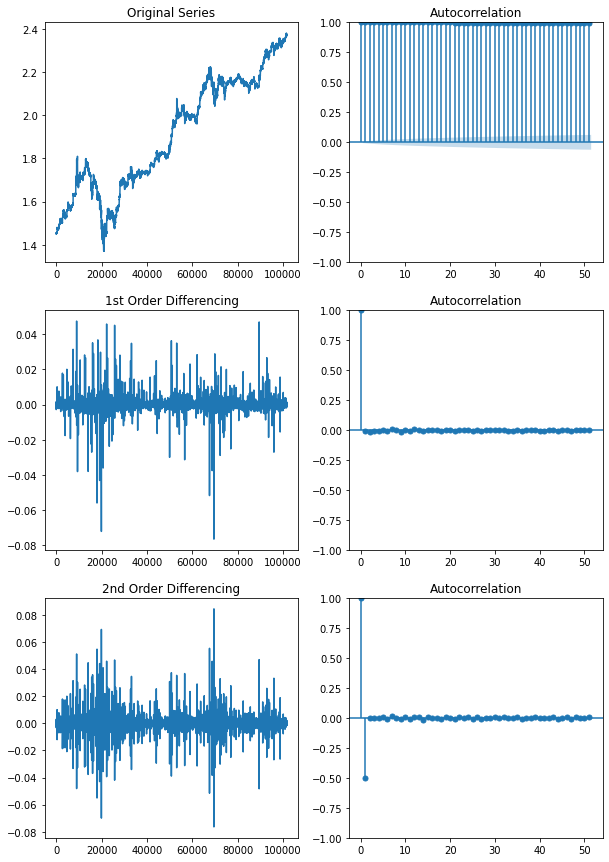

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

axes[0, 0].plot(df.close_log10)
axes[0, 0].set_title('Original Series')
plot_acf(df.close_log10, ax=axes[0, 1])

axes[1, 0].plot(df.close_log10.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.close_log10.diff().dropna(), ax=axes[1, 1])

axes[2, 0].plot(df.close_log10.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.close_log10.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [27]:
result = adfuller(df.close_log10.dropna())
print('Original Series')
print('p-value: ', result[1])

result = adfuller(df.close_log10.diff().dropna())
print('1st Order Differencing')
print('p-value: ', result[1])

result = adfuller(df.close_log10.diff().diff().dropna())
print('2nd Order Differencing')
print('p-value: ', result[1])

Original Series
p-value:  0.8485792429164943
1st Order Differencing
p-value:  0.0
2nd Order Differencing
p-value:  0.0


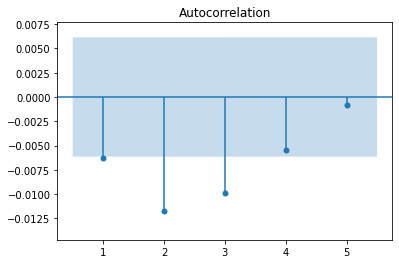

In [47]:
plot_acf(df.close_log10.diff().dropna(), lags=range(1, 6), auto_ylims=True)
plt.show()

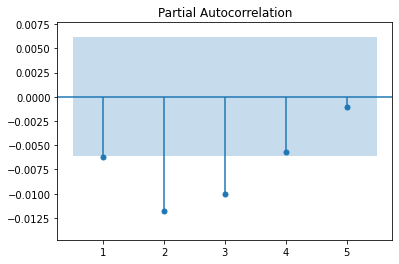

In [48]:
plot_pacf(df.close_log10.diff().dropna(), method='ywm', 
          lags=range(1, 6), auto_ylims=True)
plt.show()

In [ ]:
#p, d, q = 3, 1, 3

In [49]:
x, y = df.timestamp, df.close_log10

size = len(x)
bound = int(0.7*size)

x_train, x_test = x[:bound], x[bound:]
y_train, y_test = y[:bound], y[bound:]

In [62]:
arima_model = ARIMA(y_train, order=(2, 1, 3))
model = arima_model.fit()

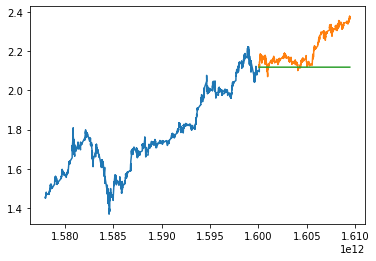

In [63]:
y_pred = model.predict(start=len(x_train), end=len(x)-1)
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)
plt.plot(x_test, y_pred)
plt.show()

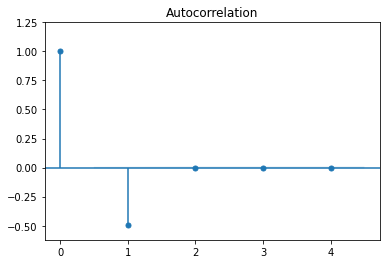

In [85]:
plot_acf(df.close_log10.diff().diff().dropna(), lags=range(0, 5), auto_ylims=True)
plt.show()

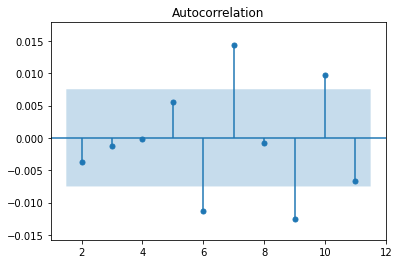

In [86]:
plot_acf(df.close_log10.diff().diff().dropna(), lags=range(2, 12), auto_ylims=True)
plt.show()

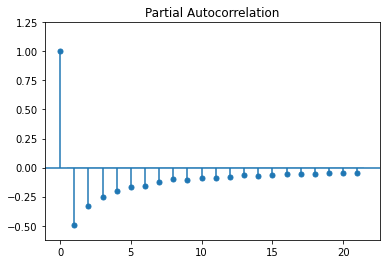

In [74]:
plot_pacf(df.close_log10.diff().diff().dropna(), method='ywm', 
          lags=range(0, 22), auto_ylims=True)
plt.show()

In [69]:
#p, d, q = 11???, 2, 2?

In [92]:
x, y = df.timestamp, df.close_log10

size = len(x)
bound = int(0.8*size)

x_train, x_test = x[:bound], x[bound:]
y_train, y_test = y[:bound], y[bound:]

In [94]:
arima_model = ARIMA(y_train, order=(6, 2, 2))
model = arima_model.fit()

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


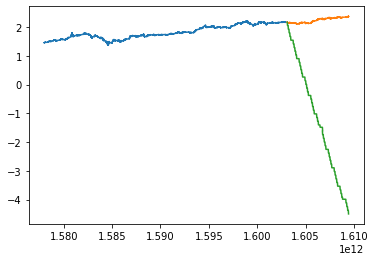

In [95]:
y_pred = model.predict(start=len(x_train), end=len(x)-1)
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)
plt.plot(x_test, y_pred)
plt.show()